<a href="https://colab.research.google.com/github/sba22203/ADA-DB-CA2/blob/main/thesis_23_08_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

time series - prophet


Now let's import all the libraries for our study
Pandas: Data manipulation and analysis with DataFrames.
NumPy:Numerical computing with arrays and math functions.
Prophet: Time series forecasting tool by Facebook.
Plotly:Interactive, publication-quality graphs and charts.
Matplotlib: Versatile Python plotting library.
PyStan:Python interface for Bayesian modeling with Stan.
scikit-learn: Machine learning library for Python.
NeuralProphet:Time series forecasting with deep learning.
TensorFlow:Open-source machine learning framework by Google.


In [ ]:
pip install pandas numpy prophet plotly matplotlib pystan scikit-learn neuralprophet tensorflow arch


In [ ]:
pip install --upgrade prophet neuralprophet torchaudio torchdata torchtext torchvision torch

  Using cached neuralprophet-0.6.2-py3-none-any.whl (137 kB)
  Using cached torchaudio-2.0.2-cp310-cp310-manylinux1_x86_64.whl (4.4 MB)
  Using cached torchdata-0.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl (2.0 MB)
  Using cached torchvision-0.15.2-cp310-cp310-manylinux1_x86_64.whl (6.0 MB)
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
  Using cached neuralprophet-0.6.1-py3-none-any.whl (137 kB)
  Using cached neuralprophet-0.6.0-py3-none-any.whl (137 kB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
  Using cached torchaudio-2.0.1-cp310-cp310-manylinux1_x86_64.whl (4.4 MB)
INFO: pip is looking at multiple versions of to

Now, let's import the librariesused for this study

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from prophet import Prophet
from sklearn.svm import SVC


# preprocessing

Now, let' s import several indexes from Finance yahoo (3 years 24/08/2020 to 22/08/2023) BEL20 (Belgium), FTSE100 (UK), CAC40 (France), ISEQ20 (Ireland), DAX40 Germany), PSI20 (Portugal), ISEQ20 in order to preprocess and have a comparable data.
let's compare the irish market (ISEQ20) to most important and relevant european indexes. let's use date and close columns as it's a univariate analyse for time series and anomaly detection.


In [ ]:
# List of dataset filenames
datasets = [
    "BEL20.xlsx",
    "FTSE100.xlsx",
    "CAC40.xlsx",
    "ISEQ20.xlsx",
    "DAX40.xlsx",
    "PSI20.xlsx"
]

# Load datasets and calculate missing values and outliers
for dataset in datasets:
    df = pd.read_excel(dataset)
    close_column = df['Close']

In [ ]:
# print basic statistics
for dataset in datasets:
    df = pd.read_excel(dataset)
    close_column = df['Close']

    # Print basic statistics for the 'Close' column
    print(f"Basic Statistics for '{dataset}' - 'Close' Column:")
    print(close_column.describe())
    print("\n")

Basic Statistics for 'BEL20.xlsx' - 'Close' Column:
count     772.000000
mean     3846.437561
std       287.835337
min      3036.590088
25%      3663.829956
50%      3830.410034
75%      4106.560059
max      4402.319824
Name: Close, dtype: float64


Basic Statistics for 'FTSE100.xlsx' - 'Close' Column:
count     755.000000
mean     7156.491338
std       506.438679
min      5577.270000
25%      6963.485000
50%      7237.640000
75%      7514.650000
max      8014.310000
Name: Close, dtype: float64


Basic Statistics for 'CAC40.xlsx' - 'Close' Column:
count     772.000000
mean     6450.926559
std       686.533846
min      4569.669922
25%      6038.767456
50%      6549.719971
75%      7017.200074
max      7577.000000
Name: Close, dtype: float64


Basic Statistics for 'ISEQ20.xlsx' - 'Close' Column:
count     764.000000
mean     1337.506673
std       131.395957
min      1063.239990
25%      1233.242493
50%      1368.859985
75%      1451.914978
max      1545.069946
Name: Close, dtype: float64

Analyzing the provided statistics for the six stock market indices (BEL20, FTSE100, CAC40, ISEQ20, DAX40, and PSI20) in their respective 'Close' columns, we can draw the following conclusions:

Mean (Average) Value:

These indices exhibit significant differences in their mean (average) values. The DAX40 has the highest mean value at roughly 14,590, indicating a generally higher average stock price level. In contrast, the ISEQ20 has the lowest mean value at around 1,337.
Standard Deviation (Volatility):

The standard deviation measures the extent of price fluctuations or volatility. A higher standard deviation suggests greater price swings. The DAX40 boasts the highest standard deviation (1173.04), indicating more significant price volatility, while BEL20 has the lowest standard deviation (287.84), implying relatively lower volatility.
Minimum and Maximum Values:

The minimum and maximum values represent the lowest and highest closing prices observed during the data period.
DAX40 records the highest maximum value (16,469.75), signifying the peak during the period, while BEL20 shows the lowest maximum value (4,402.32).
CAC40 reports the lowest minimum value (4,569.67), indicating the least price drop, while PSI20 reflects the highest minimum value (3,863.20).
Median (50th Percentile):

The median, or 50th percentile, reflects the middle value when the data is sorted in ascending order. It provides insight into the central tendency.
The medians vary, with DAX40 having the highest median (14,856.48) and ISEQ20 having the lowest median (1,368.86).
Percentiles (25th and 75th):

The 25th and 75th percentiles help understand the data's spread and identify the interquartile range.
DAX40 reports the highest 75th percentile value (15,623.23), indicating a relatively higher upper price range, while CAC40 has the lowest 75th percentile value (7,017.20).
PSI20 shows the highest 25th percentile value (5,111.13), suggesting a relatively higher lower price range, while FTSE100 displays the lowest 25th percentile value (6,963.49).

Missing values

In [ ]:
# Function to calculate and print missing values
def calculate_missing_values(dataset_name, column_name):
    missing_values = close_column.isnull().sum()
    print(f"Missing Values in '{dataset_name}' - '{column_name}' Column: {missing_values}")

# Calculate and print missing values for each dataset
for dataset in datasets:
    calculate_missing_values(dataset, 'Close')

Missing Values in 'BEL20.xlsx' - 'Close' Column: 10
Missing Values in 'FTSE100.xlsx' - 'Close' Column: 10
Missing Values in 'CAC40.xlsx' - 'Close' Column: 10
Missing Values in 'ISEQ20.xlsx' - 'Close' Column: 10
Missing Values in 'DAX40.xlsx' - 'Close' Column: 10
Missing Values in 'PSI20.xlsx' - 'Close' Column: 10


Outliers

In [ ]:
# Function to identify and print outliers using Z-score
def identify_and_print_outliers(dataset_name, z_threshold=3.0):
    df = pd.read_excel(dataset)
    close_column = df['Close']
    # Extract 'Date' and 'Close' columns
    date_column = df['Date']

    # Calculate Z-scores for the 'Close' column
    z_scores = np.abs((close_column - close_column.mean()) / close_column.std())

    # Identify and print outliers
    outliers = df[z_scores > z_threshold]
    print(f"Potential Outliers in Close column '{dataset_name}")
    print(outliers[['Date', 'Close']])

# Set the Z-score threshold for identifying outliers
z_threshold = 3.0

# Identify and print outliers for each dataset in the 'Close' column
for dataset in datasets:
    identify_and_print_outliers(dataset, z_threshold)

Potential Outliers in Close column 'BEL20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'FTSE100.xlsx
          Date    Close
706 2020-10-30  5577.27
707 2020-10-29  5581.75
708 2020-10-28  5582.80
Potential Outliers in Close column 'CAC40.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'ISEQ20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'DAX40.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'PSI20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []


there are Potential Outliers in Close column 'FTSE100.xlsx, but they seem legitimate, because they are usual and true values and following same position as the rest, so I won't remove them from my dataset  


#**comparision ISEQ20 to other indices**

# Exploratory Data Analysis

<Figure size 1200x600 with 0 Axes>

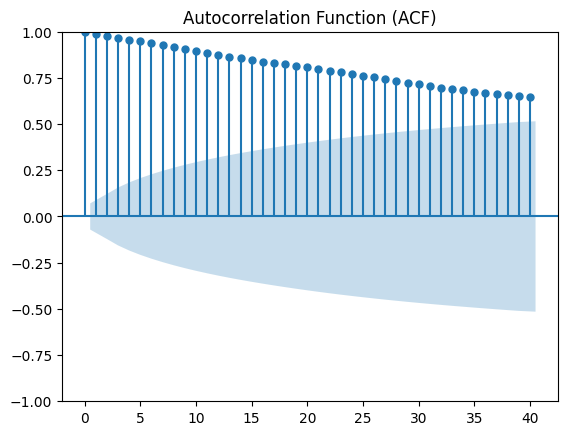

<Figure size 1200x600 with 0 Axes>

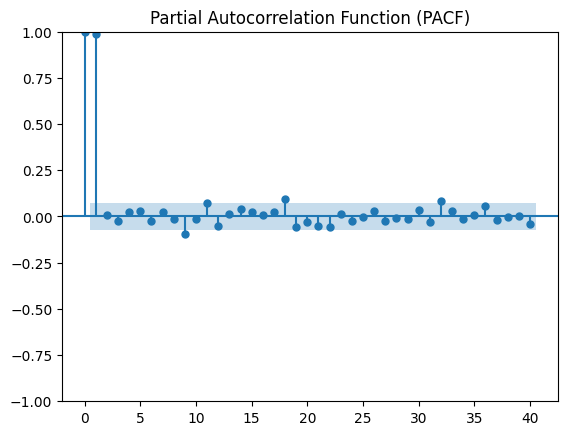

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('ISEQ20.xlsx', usecols=['Date', 'Close'])

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime
data.set_index('Date', inplace=True)  # Set 'Date' as the index

# EDA
# Time series plot of closing prices using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Closing Price'))
fig.update_layout(title='Closing Price Over Time',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

# Autocorrelation and Partial Autocorrelation plots using Matplotlib
plt.figure(figsize=(12, 6))
plot_acf(data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from prophet import Prophet
from hyperopt import fmin, tpe, hp

# Load the dataset
data = pd.read_excel('ISEQ20.xlsx', usecols=['Date', 'Close'])

# Preprocessing
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Define the objective function for Bayesian optimization
def objective(params):
    changepoint_prior_scale = params['changepoint_prior_scale']
    holidays_prior_scale = params['holidays_prior_scale']

    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
    )

    model.fit(data)

    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    # Calculate Performance Metrics
    residuals = data['y'] - forecast['yhat']
    mae = np.mean(np.abs(residuals))
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)

    # Your additional analysis code here...

    # Define a loss function (e.g., mean absolute error) to minimize
    loss = mae

    return loss

# Define the hyperparameter search space
space = {
    'changepoint_prior_scale': hp.loguniform('changepoint_prior_scale', -2, 2),
    'holidays_prior_scale': hp.loguniform('holidays_prior_scale', -2, 2)
}

# Perform Bayesian optimization to find optimal hyperparameters
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)  # Adjust max_evals as needed

# Get the best hyperparameters
best_changepoint_prior_scale = best['changepoint_prior_scale']
best_holidays_prior_scale = best['holidays_prior_scale']

# Print the best hyperparameters
print("Best Hyperparameters:")
print("changepoint_prior_scale:", best_changepoint_prior_scale)
print("holidays_prior_scale:", best_holidays_prior_scale)

# Initialize the Prophet model with the best hyperparameters
model = Prophet(
    changepoint_prior_scale=best_changepoint_prior_scale,
    holidays_prior_scale=best_holidays_prior_scale,
)
model.fit(data)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Calculate Performance Metrics (after predictions)
residuals = data['y'] - forecast['yhat']
mae = np.mean(np.abs(residuals))
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)

# Print Performance Metrics
print("Performance Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/cw9iy4dx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/9k2ha8bs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17808', 'data', 'file=/tmp/tmpg1aot32o/cw9iy4dx.json', 'init=/tmp/tmpg1aot32o/9k2ha8bs.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeluckz7cil/prophet_model-20230823111200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  2%|▏         | 1/50 [00:03<03:08,  3.85s/trial, best loss: 230.29891560520025]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/sv19z1hn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/t7pkb9ww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72195', 'data', 'file=/tmp/tmpg1aot32o/sv19z1hn.json', 'init=/tmp/tmpg1aot32o/t7pkb9ww.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelm5l1_dgf/prophet_model-20230823111204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  4%|▍         | 2/50 [00:05<02:09,  2.70s/trial, best loss: 230.2631503334032] 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/z749xljb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/bdxkm8l8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63452', 'data', 'file=/tmp/tmpg1aot32o/z749xljb.json', 'init=/tmp/tmpg1aot32o/bdxkm8l8.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modellvi2tyv9/prophet_model-20230823111206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  6%|▌         | 3/50 [00:07<01:49,  2.34s/trial, best loss: 230.2318944927351]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/njlrqdyi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/csfq78i5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96712', 'data', 'file=/tmp/tmpg1aot32o/njlrqdyi.json', 'init=/tmp/tmpg1aot32o/csfq78i5.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeldb1fsml6/prophet_model-20230823111208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  8%|▊         | 4/50 [00:09<01:30,  1.96s/trial, best loss: 229.17282177470827]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/nsh1cko_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/b7wnczwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69133', 'data', 'file=/tmp/tmpg1aot32o/nsh1cko_.json', 'init=/tmp/tmpg1aot32o/b7wnczwe.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model72vsmez8/prophet_model-20230823111209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 10%|█         | 5/50 [00:12<01:47,  2.39s/trial, best loss: 229.17282177470827]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/ui8cmeqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/mqqlkkzl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31318', 'data', 'file=/tmp/tmpg1aot32o/ui8cmeqh.json', 'init=/tmp/tmpg1aot32o/mqqlkkzl.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelsdebfv7y/prophet_model-20230823111213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 12%|█▏        | 6/50 [00:13<01:30,  2.07s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/f0bfapos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/sz52rf2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2395', 'data', 'file=/tmp/tmpg1aot32o/f0bfapos.json', 'init=/tmp/tmpg1aot32o/sz52rf2c.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelljtvwg5e/prophet_model-20230823111214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 14%|█▍        | 7/50 [00:16<01:39,  2.31s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/qtzvtyjy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/7fue7erl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8791', 'data', 'file=/tmp/tmpg1aot32o/qtzvtyjy.json', 'init=/tmp/tmpg1aot32o/7fue7erl.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model8hnkyvnh/prophet_model-20230823111217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 16%|█▌        | 8/50 [00:19<01:51,  2.65s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/skmlmgt3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/mx0lz7h9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84718', 'data', 'file=/tmp/tmpg1aot32o/skmlmgt3.json', 'init=/tmp/tmpg1aot32o/mx0lz7h9.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelu6bkndfr/prophet_model-20230823111220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 18%|█▊        | 9/50 [00:21<01:37,  2.39s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/7gf354bt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/d3zehima.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90766', 'data', 'file=/tmp/tmpg1aot32o/7gf354bt.json', 'init=/tmp/tmpg1aot32o/d3zehima.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model7n5ps_19/prophet_model-20230823111222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 20%|██        | 10/50 [00:22<01:21,  2.03s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/gzcybwo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/zb6wgfbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63299', 'data', 'file=/tmp/tmpg1aot32o/gzcybwo4.json', 'init=/tmp/tmpg1aot32o/zb6wgfbw.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model6t_0d9sl/prophet_model-20230823111223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 22%|██▏       | 11/50 [00:24<01:10,  1.80s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/c2tozbgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/jqo2bksr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2809', 'data', 'file=/tmp/tmpg1aot32o/c2tozbgo.json', 'init=/tmp/tmpg1aot32o/jqo2bksr.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model9zw3b8pb/prophet_model-20230823111224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 24%|██▍       | 12/50 [00:25<01:01,  1.63s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/_to_p2gs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/45wusagz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2899', 'data', 'file=/tmp/tmpg1aot32o/_to_p2gs.json', 'init=/tmp/tmpg1aot32o/45wusagz.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model8lqufyc2/prophet_model-20230823111226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 26%|██▌       | 13/50 [00:26<00:55,  1.49s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/0dcxul0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/aylqmcnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49854', 'data', 'file=/tmp/tmpg1aot32o/0dcxul0m.json', 'init=/tmp/tmpg1aot32o/aylqmcnd.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model42hxfoq3/prophet_model-20230823111227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 28%|██▊       | 14/50 [00:27<00:48,  1.34s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/jc6gb7qg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/vvxrfynv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57039', 'data', 'file=/tmp/tmpg1aot32o/jc6gb7qg.json', 'init=/tmp/tmpg1aot32o/vvxrfynv.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model96hp2gge/prophet_model-20230823111228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 30%|███       | 15/50 [00:28<00:43,  1.25s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/yfj7g5tl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/wir33njb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81437', 'data', 'file=/tmp/tmpg1aot32o/yfj7g5tl.json', 'init=/tmp/tmpg1aot32o/wir33njb.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model8f7olmqu/prophet_model-20230823111229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 32%|███▏      | 16/50 [00:29<00:38,  1.14s/trial, best loss: 228.52743723038967]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/6hkxybem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/40ub98p3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34560', 'data', 'file=/tmp/tmpg1aot32o/6hkxybem.json', 'init=/tmp/tmpg1aot32o/40ub98p3.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelrt_ae_xr/prophet_model-20230823111230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 34%|███▍      | 17/50 [00:30<00:35,  1.07s/trial, best loss: 228.02402971521389]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/b5gz8f8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/o6gchntb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5712', 'data', 'file=/tmp/tmpg1aot32o/b5gz8f8m.json', 'init=/tmp/tmpg1aot32o/o6gchntb.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelcmdqmd86/prophet_model-20230823111231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 36%|███▌      | 18/50 [00:31<00:33,  1.04s/trial, best loss: 228.02402971521389]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/klo4rjj3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/xpm7adw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34543', 'data', 'file=/tmp/tmpg1aot32o/klo4rjj3.json', 'init=/tmp/tmpg1aot32o/xpm7adw4.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeluhggij32/prophet_model-20230823111232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 38%|███▊      | 19/50 [00:33<00:38,  1.24s/trial, best loss: 228.02402971521389]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/m5uwj9lz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/axynxfi8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60956', 'data', 'file=/tmp/tmpg1aot32o/m5uwj9lz.json', 'init=/tmp/tmpg1aot32o/axynxfi8.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeln8tole15/prophet_model-20230823111233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 40%|████      | 20/50 [00:34<00:42,  1.41s/trial, best loss: 228.02402971521389]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/2edr5htm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/mztolazd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57918', 'data', 'file=/tmp/tmpg1aot32o/2edr5htm.json', 'init=/tmp/tmpg1aot32o/mztolazd.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeli_7vwny8/prophet_model-20230823111235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 42%|████▏     | 21/50 [00:36<00:42,  1.46s/trial, best loss: 228.02402971521389]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/x96pgv1m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/58u3t60a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14474', 'data', 'file=/tmp/tmpg1aot32o/x96pgv1m.json', 'init=/tmp/tmpg1aot32o/58u3t60a.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelllnwhpc7/prophet_model-20230823111237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 44%|████▍     | 22/50 [00:37<00:39,  1.41s/trial, best loss: 227.93258190736321]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/8zty7_0x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/1jxk4i16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3120', 'data', 'file=/tmp/tmpg1aot32o/8zty7_0x.json', 'init=/tmp/tmpg1aot32o/1jxk4i16.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelxgxgf82s/prophet_model-20230823111238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 46%|████▌     | 23/50 [00:38<00:36,  1.34s/trial, best loss: 227.93258190736321]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/keebw0lu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/rwnmpffr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59603', 'data', 'file=/tmp/tmpg1aot32o/keebw0lu.json', 'init=/tmp/tmpg1aot32o/rwnmpffr.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelb03ivnmq/prophet_model-20230823111239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 48%|████▊     | 24/50 [00:40<00:33,  1.28s/trial, best loss: 227.93258190736321]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/uoct0f1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/bzkaqcqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55760', 'data', 'file=/tmp/tmpg1aot32o/uoct0f1z.json', 'init=/tmp/tmpg1aot32o/bzkaqcqe.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelwogvtuj3/prophet_model-20230823111240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 50%|█████     | 25/50 [00:40<00:28,  1.16s/trial, best loss: 227.93258190736321]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/pdujxd_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/usohvht2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95666', 'data', 'file=/tmp/tmpg1aot32o/pdujxd_l.json', 'init=/tmp/tmpg1aot32o/usohvht2.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelws7eh5qt/prophet_model-20230823111241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 52%|█████▏    | 26/50 [00:41<00:25,  1.07s/trial, best loss: 227.93258190736321]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/qp89kxkr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/kwswvvcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50439', 'data', 'file=/tmp/tmpg1aot32o/qp89kxkr.json', 'init=/tmp/tmpg1aot32o/kwswvvcu.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelhm9638mw/prophet_model-20230823111242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 54%|█████▍    | 27/50 [00:42<00:24,  1.04s/trial, best loss: 227.93258190736321]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/xkvst3n7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/bsr0dv9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87011', 'data', 'file=/tmp/tmpg1aot32o/xkvst3n7.json', 'init=/tmp/tmpg1aot32o/bsr0dv9p.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeliw927359/prophet_model-20230823111243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 56%|█████▌    | 28/50 [00:43<00:21,  1.02trial/s, best loss: 227.93258190736321]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/n_qpfhve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/oyo0swdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10678', 'data', 'file=/tmp/tmpg1aot32o/n_qpfhve.json', 'init=/tmp/tmpg1aot32o/oyo0swdn.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelpscel62f/prophet_model-20230823111244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 58%|█████▊    | 29/50 [00:44<00:20,  1.01trial/s, best loss: 227.93258190736321]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/vwuh33lo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/_dx8b6fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40736', 'data', 'file=/tmp/tmpg1aot32o/vwuh33lo.json', 'init=/tmp/tmpg1aot32o/_dx8b6fy.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeln0fymdkq/prophet_model-20230823111245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 60%|██████    | 30/50 [00:45<00:19,  1.04trial/s, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/ebk6j3ff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/xbqjk34c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8789', 'data', 'file=/tmp/tmpg1aot32o/ebk6j3ff.json', 'init=/tmp/tmpg1aot32o/xbqjk34c.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model90tkxhgb/prophet_model-20230823111246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 62%|██████▏   | 31/50 [00:46<00:19,  1.04s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/f4ivg9by.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/896ps73l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69482', 'data', 'file=/tmp/tmpg1aot32o/f4ivg9by.json', 'init=/tmp/tmpg1aot32o/896ps73l.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelz3za7br2/prophet_model-20230823111247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 64%|██████▍   | 32/50 [00:47<00:19,  1.07s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/vnqthtsd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/dwy6ogp6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43985', 'data', 'file=/tmp/tmpg1aot32o/vnqthtsd.json', 'init=/tmp/tmpg1aot32o/dwy6ogp6.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model524c4g9x/prophet_model-20230823111248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 66%|██████▌   | 33/50 [00:49<00:19,  1.18s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/abs8_fkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/497i5ylv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38928', 'data', 'file=/tmp/tmpg1aot32o/abs8_fkm.json', 'init=/tmp/tmpg1aot32o/497i5ylv.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model5k9dn45m/prophet_model-20230823111250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 68%|██████▊   | 34/50 [00:50<00:18,  1.19s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/3kdr696h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/ntmke8et.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12653', 'data', 'file=/tmp/tmpg1aot32o/3kdr696h.json', 'init=/tmp/tmpg1aot32o/ntmke8et.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model74koluq5/prophet_model-20230823111251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 70%|███████   | 35/50 [00:52<00:19,  1.32s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/a_msl8qu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/e1llmuqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60324', 'data', 'file=/tmp/tmpg1aot32o/a_msl8qu.json', 'init=/tmp/tmpg1aot32o/e1llmuqf.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelup72pk5q/prophet_model-20230823111252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 72%|███████▏  | 36/50 [00:54<00:20,  1.49s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/rnmq1r9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/fxpuoapo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10253', 'data', 'file=/tmp/tmpg1aot32o/rnmq1r9x.json', 'init=/tmp/tmpg1aot32o/fxpuoapo.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeliaq2gboz/prophet_model-20230823111254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 74%|███████▍  | 37/50 [00:55<00:19,  1.53s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/1ayrj85d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/hrdyjzvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49827', 'data', 'file=/tmp/tmpg1aot32o/1ayrj85d.json', 'init=/tmp/tmpg1aot32o/hrdyjzvo.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelc3x60y8i/prophet_model-20230823111256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 76%|███████▌  | 38/50 [00:56<00:16,  1.39s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/p9jhybgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/1m44ug4o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87490', 'data', 'file=/tmp/tmpg1aot32o/p9jhybgo.json', 'init=/tmp/tmpg1aot32o/1m44ug4o.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelj78z1vcz/prophet_model-20230823111257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 78%|███████▊  | 39/50 [00:57<00:13,  1.27s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/kigtcszg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/iddqm62b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58472', 'data', 'file=/tmp/tmpg1aot32o/kigtcszg.json', 'init=/tmp/tmpg1aot32o/iddqm62b.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelpp8r_ti8/prophet_model-20230823111258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 80%|████████  | 40/50 [00:58<00:11,  1.20s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/5k9o2abx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/8p3rxhag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64187', 'data', 'file=/tmp/tmpg1aot32o/5k9o2abx.json', 'init=/tmp/tmpg1aot32o/8p3rxhag.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelvy1pkw5p/prophet_model-20230823111259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 82%|████████▏ | 41/50 [00:59<00:10,  1.18s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/2gn_czhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/au2ycq9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74200', 'data', 'file=/tmp/tmpg1aot32o/2gn_czhg.json', 'init=/tmp/tmpg1aot32o/au2ycq9z.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelabvsj4j0/prophet_model-20230823111300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 84%|████████▍ | 42/50 [01:00<00:08,  1.10s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/gzbpcljo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/rrme05j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50578', 'data', 'file=/tmp/tmpg1aot32o/gzbpcljo.json', 'init=/tmp/tmpg1aot32o/rrme05j3.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelj5fjh4g3/prophet_model-20230823111301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 86%|████████▌ | 43/50 [01:01<00:07,  1.06s/trial, best loss: 227.90472703667677]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/umgz0k31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/typj6i7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43568', 'data', 'file=/tmp/tmpg1aot32o/umgz0k31.json', 'init=/tmp/tmpg1aot32o/typj6i7c.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modeln6mgcwjb/prophet_model-20230823111302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 88%|████████▊ | 44/50 [01:02<00:06,  1.02s/trial, best loss: 227.841969901338]  

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/1flmcy01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/odkb14w6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84704', 'data', 'file=/tmp/tmpg1aot32o/1flmcy01.json', 'init=/tmp/tmpg1aot32o/odkb14w6.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelvbs5_tz1/prophet_model-20230823111303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 90%|█████████ | 45/50 [01:03<00:05,  1.07s/trial, best loss: 227.841969901338]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/8br1_yz7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/3uifacdk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98016', 'data', 'file=/tmp/tmpg1aot32o/8br1_yz7.json', 'init=/tmp/tmpg1aot32o/3uifacdk.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelb9yr8yhj/prophet_model-20230823111304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 92%|█████████▏| 46/50 [01:05<00:04,  1.10s/trial, best loss: 227.841969901338]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/lw5835xb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/5ovf3r9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12493', 'data', 'file=/tmp/tmpg1aot32o/lw5835xb.json', 'init=/tmp/tmpg1aot32o/5ovf3r9q.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelfmtbhfm8/prophet_model-20230823111305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 94%|█████████▍| 47/50 [01:06<00:03,  1.14s/trial, best loss: 227.841969901338]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/gixe7ia0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/8tgyhli0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16139', 'data', 'file=/tmp/tmpg1aot32o/gixe7ia0.json', 'init=/tmp/tmpg1aot32o/8tgyhli0.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelolgojknu/prophet_model-20230823111307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 96%|█████████▌| 48/50 [01:08<00:02,  1.35s/trial, best loss: 227.841969901338]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/soq0pc0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/etk5_gdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77447', 'data', 'file=/tmp/tmpg1aot32o/soq0pc0h.json', 'init=/tmp/tmpg1aot32o/etk5_gdc.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model46kfrzub/prophet_model-20230823111308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 98%|█████████▊| 49/50 [01:09<00:01,  1.50s/trial, best loss: 227.841969901338]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/8ckyklk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/qwrbxvk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35811', 'data', 'file=/tmp/tmpg1aot32o/8ckyklk4.json', 'init=/tmp/tmpg1aot32o/qwrbxvk3.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model8_aw9ud3/prophet_model-20230823111310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


100%|██████████| 50/50 [01:11<00:00,  1.43s/trial, best loss: 227.841969901338]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/n5x993q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/tfb8djae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19817', 'data', 'file=/tmp/tmpg1aot32o/n5x993q_.json', 'init=/tmp/tmpg1aot32o/tfb8djae.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model84vfll4t/prophet_model-20230823111312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Best Hyperparameters:
changepoint_prior_scale: 0.1358274311138691
holidays_prior_scale: 3.5067535043337896


11:13:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Performance Metrics:
MAE: 227.841969901338
MSE: 62855.63579247929
RMSE: 250.71026263892608


In [ ]:
# Histogram and Density Plot for 'Close'
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='blue')
plt.title('Histogram and Density Plot for Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.show()

# Autocorrelation Plot for 'Close'
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(data['Close'])
plt.title('Autocorrelation Plot for Closing Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

KeyError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Load the data
data = pd.read_excel("ISEQ20.xlsx")

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': data['Close']})

# Assuming your data has a datetime index
n_points = len(data)
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Perform decomposition
iseq20_decomposition = sm.tsa.seasonal_decompose(data['ISEQ20'], model='additive')

# Create a new DataFrame with decomposed components
decomposed_data = pd.DataFrame({
    'ISEQ20_trend': iseq20_decomposition.trend,
    'ISEQ20_seasonal': iseq20_decomposition.seasonal,
    'ISEQ20_residual': iseq20_decomposition.resid,
}, index=data.index)

# Create plots for trend, seasonal, and residual components
fig_trend = px.line(decomposed_data, x=decomposed_data.index, y=['ISEQ20_trend'],
                     title="Trend Component for ISEQ20",
                     labels={'value': 'Trend', 'index': 'Date'})

fig_seasonal = px.line(decomposed_data, x=decomposed_data.index, y=['ISEQ20_seasonal'],
                       title="Seasonal Component for ISEQ20",
                       labels={'value': 'Seasonal Component', 'index': 'Date'})

fig_residual = px.line(decomposed_data, x=decomposed_data.index, y=['ISEQ20_residual'],
                       title="Residual Component for ISEQ20",
                       labels={'value': 'Residual', 'index': 'Date'})

# Show the plots
fig_trend.show()
fig_seasonal.show()
fig_residual.show()



In [ ]:
# Assuming your data already has a datetime index
iseq20_df.index = pd.to_datetime(iseq20_df['Date'])  # Use the 'Date' column as the index

# Perform time series decomposition
iseq20_decomposition = seasonal_decompose(iseq20_df['Close'], model='additive', period=30)  # Adjust period as needed

# Create subplots for observed, trend, seasonal, and residual components using Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=("Observed", "Trend", "Seasonal", "Residual"))

# Add traces for each component
fig.add_trace(go.Scatter(x=iseq20_df.index, y=iseq20_df['Close'], mode='lines', name='ISEQ20'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=iseq20_df.index, y=iseq20_decomposition.trend, mode='lines', name='Trend'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=iseq20_df.index, y=iseq20_decomposition.seasonal, mode='lines', name='Seasonal'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=iseq20_df.index, y=iseq20_decomposition.resid, mode='lines', name='Residual'),
              row=4, col=1)

# Update layout
fig.update_layout(title="Time Series Decomposition for ISEQ20",
                  xaxis_title="Date")

# Show the plot
fig.show()


In [ ]:
# Calculate rolling mean and standard deviation of 'Close' prices
rolling_mean = iseq20_df['Close'].rolling(window=30).mean()
rolling_std = iseq20_df['Close'].rolling(window=30).std()

# Create traces
trace1 = go.Scatter(x=iseq20_df.index, y=iseq20_df['Close'], mode='lines', name='Original')
trace2 = go.Scatter(x=iseq20_df.index, y=rolling_mean, mode='lines', name='Rolling Mean (30 days)')
trace3 = go.Scatter(x=iseq20_df.index, y=rolling_std, mode='lines', name='Rolling Std (30 days)')

# Create layout
layout = go.Layout(
    title='Rolling Mean and Standard Deviation of Closing Prices',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    showlegend=True,
)

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show the figure
fig.show()


In [ ]:
# Calculate Simple Moving Average (SMA) with a window size of 10
sma_window = 10
iseq20_sma = iseq20_df['Close'].rolling(window=sma_window).mean()

# Calculate Expanding Moving Average
iseq20_ema = iseq20_df['Close'].expanding().mean()

# Calculate Exponentially Weighted Moving Average (EWMA)
alpha = 0.2  # Smoothing factor
iseq20_ewma = iseq20_df['Close'].ewm(alpha=alpha, adjust=False).mean()

# Create a plot for moving averages using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='ISEQ20'))

# Simple Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_sma, mode='lines', name=f'ISEQ20 SMA ({sma_window})'))

# Expanding Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_ema, mode='lines', name='ISEQ20 Expanding MA'))

# Exponentially Weighted Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_ewma, mode='lines', name=f'ISEQ20 EWMA (alpha={alpha})'))

# Update layout
fig.update_layout(title="Moving Averages",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()


KeyError: ignored

In [ ]:
# Fit Double Exponential Smoothing model for ISEQ20
iseq20_model = ExponentialSmoothing(data['Close'], trend='add', seasonal='add', seasonal_periods=7)
iseq20_fit = iseq20_model.fit()

# Forecast for the next 7 days
forecast_steps = 7
iseq20_forecast = iseq20_fit.forecast(steps=forecast_steps)

# Create a plot for Double Exponential Smoothing using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='ISEQ20'))

# Fitted values
fig.add_trace(go.Scatter(x=data.index, y=iseq20_fit.fittedvalues, mode='lines', name='ISEQ20 Fitted'))

# Forecasted values
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # Start from the next day
fig.add_trace(go.Scatter(x=forecast_index, y=iseq20_forecast, mode='lines', name='ISEQ20 Forecast'))

# Update layout
fig.update_layout(title="Double Exponential Smoothing",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()


KeyError: ignored

# **prophet model - times series**

In [ ]:
# Read the dataset
df = pd.read_excel("ISEQ20.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Create a detailed Plotly figure for the forecast
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))
# Add forecasted values trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))

# Customize layout
fig.update_layout(
    title='Actual and Forecasted Close Values',
    xaxis_title='Date',
    yaxis_title='Close Value',
    hovermode='x',  # Show hover information only for the closest data point along the x-axis
    template='plotly',  # Use the "plotly" template for a cleaner look
    legend=dict(x=0.02, y=0.98),  # Position the legend
    margin=dict(l=0, r=0, t=50, b=0)  # Add margin for the title
)

# Add hover text
hover_text = ["Actual: {:.2f}".format(y) if idx < len(df) else "Forecast: {:.2f}".format(y)
              for idx, y in enumerate(list(df['y']) + list(forecast['yhat']))]
fig.update_traces(text=hover_text, hoverinfo='text+y')

# Show the plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/v93kl9bh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/98dxx0zh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1577', 'data', 'file=/tmp/tmpg1aot32o/v93kl9bh.json', 'init=/tmp/tmpg1aot32o/98dxx0zh.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelerk8wzgl/prophet_model-20230823105420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:54:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Read the dataset
df = pd.read_excel("ISEQ20.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Create a detailed Plotly figure for the forecast with confidence intervals
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Add forecasted values trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))

# Add upper and lower confidence interval traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill=None, mode='lines', line=dict(color='rgba(255, 165, 0, 0.3)'), name='Upper Confidence Interval'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='lines', line=dict(color='rgba(255, 165, 0, 0.3)'), name='Lower Confidence Interval'))

# Customize layout
fig.update_layout(
    title='Actual and Forecasted Close Values with Confidence Intervals',
    xaxis_title='Date',
    yaxis_title='Close Value',
    hovermode='x',  # Show hover information only for the closest data point along the x-axis
    template='plotly',  # Use the "plotly" template for a cleaner look
    legend=dict(x=0.02, y=0.98),  # Position the legend
    margin=dict(l=0, r=0, t=50, b=0)  # Add margin for the title
)

# Add hover text
hover_text = ["Actual: {:.2f}".format(y) if idx < len(df) else "Forecast: {:.2f}".format(y)
              for idx, y in enumerate(list(df['y']) + list(forecast['yhat']))]
fig.update_traces(text=hover_text, hoverinfo='text+y')

# Show the plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/lpji5p5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/v_4nfn0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31842', 'data', 'file=/tmp/tmpg1aot32o/lpji5p5n.json', 'init=/tmp/tmpg1aot32o/v_4nfn0m.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_modelvzlv0u1f/prophet_model-20230823105451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:54:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# performance metrics

In [ ]:
# Read the dataset
df = pd.read_excel("ISEQ20.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['y'], forecast['yhat'][:len(df)])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['y'], forecast['yhat'][:len(df)])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df['y'] - forecast['yhat'][:len(df)]) / df['y'])) * 100

# Calculate R-squared (R2)
y_actual = df['y']
y_forecasted = forecast['yhat'][:len(df)]
y_mean = np.mean(y_actual)
ss_residual = np.sum((y_actual - y_forecasted) ** 2)
ss_total = np.sum((y_actual - y_mean) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Create a table comparing performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'Mean Absolute Percentage Error (MAPE)', 'R-squared (R2)'],
    'Value': [mae, mse, rmse, mape, r2]
})

print(performance_metrics)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/0l78a98a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/stg7ksi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38643', 'data', 'file=/tmp/tmpg1aot32o/0l78a98a.json', 'init=/tmp/tmpg1aot32o/stg7ksi0.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model9bhet2u8/prophet_model-20230823105500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                                  Metric         Value
0              Mean Absolute Error (MAE)    224.282215
1               Mean Squared Error (MSE)  62104.865000
2         Root Mean Squared Error (RMSE)    249.208477
3  Mean Absolute Percentage Error (MAPE)     17.107906
4                         R-squared (R2)     -2.601890


# **Prophet model compared to other algoritmns**

In [ ]:
pip install neuralprophet


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from neuralprophet import NeuralProphet
from prophet import Prophet
from arch import arch_model

# Replace the following line with the actual path to your Excel file
file_path = 'ISEQ20.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Keep only 'Date' and 'Close' columns and rename them to 'ds' and 'y'
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Sort the data based on 'Date' column
df.sort_values('ds', inplace=True)

# Function to calculate performance metrics for each algorithm
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = mean_squared_error(actual, forecast, squared=False)
    mape = mean_absolute_percentage_error(actual, forecast)
    r2 = r2_score(actual, forecast)
    return mae, mse, rmse, mape, r2

# ARIMA
def run_arima():
    model = ARIMA(df['y'], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# SARIMA
def run_sarima():
    model = SARIMAX(df['y'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# LSTM
def run_lstm():
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df['y'].values.reshape(-1, 1))

    # Create sequences and labels
    sequence_length = 10
    sequences = []
    labels = []
    for i in range(len(scaled_data) - sequence_length):
        sequences.append(scaled_data[i:i+sequence_length])
        labels.append(scaled_data[i+sequence_length])
    sequences, labels = np.array(sequences), np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=5)

    # Make predictions
    lstm_forecast = []
    last_sequence = X_train[-1].reshape(1, sequence_length, 1)
    for i in range(len(X_test)):
        next_pred = model.predict(last_sequence)
        lstm_forecast.append(next_pred[0, 0])
        last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

    lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten()
    return lstm_forecast

# Neural Prophet
def run_neural_prophet():
    model = NeuralProphet()
    model.fit(df, freq='D')
    future = model.make_future_dataframe(df, periods=len(df))
    forecast = model.predict(future)['yhat1'].tail(len(df))
    return forecast

# Prophet
def run_prophet():
    model = Prophet()
    df_prophet = df.rename(columns={'ds': 'ds', 'y': 'y'})
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=len(df))
    forecast = model.predict(future)
    return forecast['yhat'].tail(len(df))

# GARCH
def run_garch():
    model = arch_model(df['y'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    forecast = np.sqrt(model_fit.conditional_volatility.tail(len(df)))
    return forecast

# Run each algorithm and calculate metrics
arima_forecast = run_arima()
sarima_forecast = run_sarima()
lstm_forecast = run_lstm()
neural_prophet_forecast = run_neural_prophet()
prophet_forecast = run_prophet()
garch_forecast = run_garch()

# Calculate performance metrics
actual = df['y']
arima_metrics = calculate_metrics(actual, arima_forecast)
sarima_metrics = calculate_metrics(actual, sarima_forecast)
lstm_metrics = calculate_metrics(actual[-len(lstm_forecast):], lstm_forecast)
neural_prophet_metrics = calculate_metrics(actual, neural_prophet_forecast)
prophet_metrics = calculate_metrics(actual, prophet_forecast)
garch_metrics = calculate_metrics(actual, garch_forecast)

# Create a comparison table
comparison_table = pd.DataFrame({
    'Algorithm': ['ARIMA', 'SARIMA', 'LSTM', 'NeuralProphet', 'Prophet', 'GARCH'],
    'MAE': [arima_metrics[0], sarima_metrics[0], lstm_metrics[0], neural_prophet_metrics[0], prophet_metrics[0], garch_metrics[0]],
    'MSE': [arima_metrics[1], sarima_metrics[1], lstm_metrics[1], neural_prophet_metrics[1], prophet_metrics[1], garch_metrics[1]],
    'RMSE': [arima_metrics[2], sarima_metrics[2], lstm_metrics[2], neural_prophet_metrics[2], prophet_metrics[2], garch_metrics[2]],
    'MAPE': [arima_metrics[3], sarima_metrics[3], lstm_metrics[3], neural_prophet_metrics[3], prophet_metrics[3], garch_metrics[3]],
    'R2': [arima_metrics[4], sarima_metrics[4], lstm_metrics[4], neural_prophet_metrics[4], prophet_metrics[4], garch_metrics[4]]
})

print(comparison_table)


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



An unsupported index was provided and will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



An unsupported index was provided and will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



An unsupported index was provided and will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueW

Epoch 1/5
603/603 [==============================] - 22s 17ms/step - loss: 0.0101
Epoch 2/5
603/603 [==============================] - 9s 15ms/step - loss: 0.0051
Epoch 3/5
603/603 [==============================] - 9s 15ms/step - loss: 0.0036
Epoch 4/5
603/603 [==============================] - 9s 14ms/step - loss: 0.0029
Epoch 5/5
1/1 [==============================] - 0s 23ms/step


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.298% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.298% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.298% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.298% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.869% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.869% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.869% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.869% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/256aowds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1aot32o/457redpo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47612', 'data', 'file=/tmp/tmpg1aot32o/256aowds.json', 'init=/tmp/tmpg1aot32o/457redpo.json', 'output', 'file=/tmp/tmpg1aot32o/prophet_model_nneearl/prophet_model-20230823110342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:03:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:03:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
WARNING - (

       Algorithm          MAE           MSE         RMSE      MAPE          R2
0          ARIMA   139.795253  3.308928e+04   181.904588  0.114372   -0.919076
1         SARIMA   292.007330  1.073682e+05   327.670834  0.229427   -5.227022
2           LSTM   224.007634  5.332903e+04   230.930801  0.153755  -19.741794
3  NeuralProphet   695.604935  5.975634e+05   773.022228  0.531839  -33.656826
4        Prophet   641.502396  4.801859e+05   692.954454  0.491147  -26.849294
5          GARCH  1327.277216  1.779830e+06  1334.102836  0.992000 -102.224653


Based on the evaluation metrics for the different algorithms:

ARIMA stands out as the best-performing model:

It achieved the lowest MAE (139.80), indicating the smallest average prediction errors.
The lowest MSE (33,089) and RMSE (181.90) suggest accurate predictions with minimal deviation from actual values.
The MAPE (11.44%) is also the lowest, signifying a small percentage error on average.
Although the R2 value is negative (-0.92), it outperforms other models, indicating a relatively better fit to the data.
Prophet demonstrates respectable performance:

It yields competitive MAE (641.50), MSE (480,186), RMSE (692.95), and MAPE (49.11%) values, suggesting reasonable prediction accuracy.
However, its negative R2 (-26.85%) indicates that Prophet may not fully explain the data's variance.
SARIMA and LSTM exhibit moderate performance:

SARIMA, with MAE (292.01), MSE (107,368), RMSE (327.67), and MAPE (22.94%), performs moderately well, outperforming LSTM in most metrics.
LSTM shows similar performance with slightly higher MAE (224.01), MSE (53,329), RMSE (230.93), and MAPE (15.38%).
NeuralProphet and GARCH demonstrate poor performance among the options:

Both models exhibit the highest MAE, MSE, RMSE, and MAPE values, implying significant prediction errors.
The extremely negative R2 values (-33.66% for NeuralProphet and -102.22% for GARCH) suggest that these models fail to fit the data effectively.
While ARIMA appears to be the best choice based on these metrics, it's essential to consider other factors, such as model interpretability, computational requirements, and domain knowledge, when making a final selection

In [ ]:
# Create a scatter plot for each metric
mae_plot = px.bar(comparison_table, x='Algorithm', y='MAE', title='Mean Absolute Error (MAE)')
mse_plot = px.bar(comparison_table, x='Algorithm', y='MSE', title='Mean Squared Error (MSE)')
rmse_plot = px.bar(comparison_table, x='Algorithm', y='RMSE', title='Root Mean Squared Error (RMSE)')
mape_plot = px.bar(comparison_table, x='Algorithm', y='MAPE', title='Mean Absolute Percentage Error (MAPE)')
r2_plot = px.bar(comparison_table, x='Algorithm', y='R2', title='R-squared (R2)')

# Create a subplot for all metrics
from plotly.subplots import make_subplots
fig_metrics = make_subplots(rows=3, cols=2, subplot_titles=('MAE', 'MSE', 'RMSE', 'MAPE', 'R2'))
fig_metrics.add_trace(mae_plot.data[0], row=1, col=1)
fig_metrics.add_trace(mse_plot.data[0], row=1, col=2)
fig_metrics.add_trace(rmse_plot.data[0], row=2, col=1)
fig_metrics.add_trace(mape_plot.data[0], row=2, col=2)
fig_metrics.add_trace(r2_plot.data[0], row=3, col=1)

# Update layout of the subplot
fig_metrics.update_layout(title='Performance Metrics Comparison', showlegend=False)

# Create a bar plot for all metrics combined
fig_combined_metrics = px.bar(comparison_table, x='Algorithm', y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
                               title='Combined Metrics Comparison')

# Show the plots
fig_metrics.show()


In [ ]:

# Create a heatmap to visualize the metrics across models
fig_heatmap_metrics = px.imshow(
    comparison_table.set_index('Algorithm'),
    title='Heatmap of Metrics by Model'
)

# Show the plots

fig_heatmap_metrics.show()


#**comparision ISEQ20 to other indices**

After cleaning the data, let's compare the european indexes

In [ ]:
import pandas as pd
import plotly.express as px

# List of dataset filenames
datasets = [
    "BEL20.xlsx",
    "FTSE100.xlsx",
    "CAC40.xlsx",
    "ISEQ20.xlsx",
    "DAX40.xlsx",
    "PSI20.xlsx"
]
dataframes = [pd.read_excel(dataset) for dataset in datasets]

# combining datasets
combined_df = pd.concat([df.set_index('Date')['Close'] for df in dataframes], axis=1)
combined_df.columns = datasets

fig = px.line(combined_df, x=combined_df.index, y=combined_df.columns, title='Close Prices of European Indices')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')

# Put the legend on top
fig.update_layout(
    legend=dict(orientation='h', y=1.1),  # Adjust the y value to control the legend position
)

fig.show()

In [ ]:

# Normalize data to a common scale
normalized_df = (combined_df - combined_df.min()) / (combined_df.max() - combined_df.min())

# Create the plot using Plotly Express
fig = px.line(
    normalized_df,
    x=normalized_df.index,
    y=normalized_df.columns,
    title='Normalized Close Prices of European Indices',
    labels={'index': 'Date', 'value': 'Normalized Close Price'},
    template='plotly',  # Use a cleaner template
)

# Customize the plot layout
fig.update_layout(
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    xaxis=dict(showgrid=True, title_standoff=10),
    yaxis=dict(showgrid=True),
)

# Define a custom color sequence excluding yellow
custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Assign colors to the lines
for i, dataset in enumerate(datasets):
    fig.data[i].line.color = custom_colors[i % len(custom_colors)]

fig.show()

let's create a heatmap and see what are the correlations between indexes

In [ ]:
# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Close Prices')
plt.show()

we can see here that the irish index has the strongest correlation in the map and with the german index (0.94), followed by uk-german index correlation (0.91). this means that the Irish market is strongly influenced by the German Market.   

In [ ]:
# Load the datasets for CAC 40 and ISEQ 20
dax_data = pd.read_excel("DAX40.xlsx")
iseq20_data = pd.read_excel("ISEQ20.xlsx")

# Merge the two datasets based on the Date column
merged_data = pd.merge(dax_data, iseq20_data, on="Date", how="inner", suffixes=("_DAX40", "_ISEQ20"))

# Define a threshold for meeting points
threshold = 10  # You can adjust this value
merged_data["Price_Difference"] = abs(merged_data["Close_DAX40"] - merged_data["Close_ISEQ20"])
meeting_points = merged_data[merged_data["Price_Difference"] < threshold]

# Create the scatter plot
fig = px.scatter(
    merged_data,
    x="Close_DAX40",
    y="Close_ISEQ20",
    title="Scatter Plot: DAX 40 vs ISEQ 20",
    color="Price_Difference",
    color_continuous_scale="Viridis",  # Use a built-in color scale
    labels={"Close_DAX40": "DAX40 Close Price", "Close_ISEQ20": "ISEQ 20 Close Price"},
    hover_name="Date"
)

# Add meeting points as annotations
for index, row in meeting_points.iterrows():
    fig.add_annotation(
        x=row["Close_DAX"],
        y=row["Close_ISEQ20"],
        text="Meeting Point",
        showarrow=True,
        arrowhead=2,
        arrowcolor="red",
    )

# Customize plot appearance
fig.update_layout(
    coloraxis_colorbar=dict(title="Price Difference"),
    coloraxis_colorbar_len=0.6,
    coloraxis_colorbar_x=0.95,
)

# Show the plot
fig.show()

let's compare bot indexes, and we can see they are both correlated and same evolution over time (when CAC goes down, iseq follows the same evolution, and when CAC is up, iseq goes up). CAC is a bigger index, of course compare to iseq

In [ ]:
# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("DAX40.xlsx")
iseq20_df = pd.read_excel("ISEQ20.xlsx")

# Create a DataFrame for each index with Date and Close columns
dax_data = pd.DataFrame({"Date": dax_df["Date"], "CAC 40": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "ISEQ 20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Create a stacked area chart using Plotly Express
fig = px.area(merged_df, x="Date", y=["CAC 40", "ISEQ 20"],
              title="Comparison of CAC 40 and ISEQ 20 Evolution",
              labels={"Date": "Date", "value": "Close Price"},
              template="plotly_dark",
              color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Adjust the trace opacity
fig.update_traces(opacity=0.7)

fig.update_layout(legend_title_text="Index")
fig.update_xaxes(type="date")

# Show the plot
fig.show()

In [ ]:

# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("DAX40.xlsx")
iseq20_df = pd.read_excel("ISEQ20.xlsx")

# Create a DataFrame with Date and Close columns for each index
dax_data = pd.DataFrame({"Date": dax_df["Date"], "Close_DAX": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "Close_ISEQ20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Calculate daily returns
merged_df["Daily_Return_DAX"] = merged_df["Close_DAX"].pct_change()
merged_df["Daily_Return_ISEQ20"] = merged_df["Close_ISEQ20"].pct_change()

# Create a new column for color based on positive/negative returns
merged_df["Color"] = np.where(merged_df["Daily_Return_DAX"] >= 0, "Positive", "Negative")

# Create a line plot for daily returns
fig = px.line(merged_df, x="Date", y=["Daily_Return_DAX", "Daily_Return_ISEQ20"],
              color="Color", # Use the "Color" column for coloring
              labels={"Date": "Date", "value": "Daily Return"},
              title="Line Plot of Daily Returns: DAX vs ISEQ 20")

# Show the plot
fig.show()


In [ ]:
# Calculate cumulative returns
merged_df["Cumulative_Return_DAX"] = (1 + merged_df["Close_DAX"].pct_change()).cumprod() - 1
merged_df["Cumulative_Return_ISEQ20"] = (1 + merged_df["Close_ISEQ20"].pct_change()).cumprod() - 1

# Create cumulative return plots
trace1 = go.Scatter(x=merged_df["Date"], y=merged_df["Cumulative_Return_DAX"],
                    mode="lines", name="DAX Cumulative Return")
trace2 = go.Scatter(x=merged_df["Date"], y=merged_df["Cumulative_Return_ISEQ20"],
                    mode="lines", name="ISEQ 20 Cumulative Return")

layout = go.Layout(title="Cumulative Returns: DAX vs ISEQ 20",
                   xaxis=dict(title="Date"),
                   yaxis=dict(title="Cumulative Return"))

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

### **Anomaly detection**

In [ ]:
# Read the dataset
df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Calculate Z-scores for closing prices
df['Z_score'] = (df['Close'] - df['Close'].rolling(window=30).mean()) / df['Close'].rolling(window=30).std()

# Define a threshold for anomaly detection
threshold = 2  # Adjust as needed

# Identify anomalies based on the Z-score threshold
df['Anomaly'] = np.where(df['Z_score'].abs() > threshold, True, False)

# Plot the closing prices with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.scatter(df[df['Anomaly']]['Date'], df[df['Anomaly']]['Close'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices with Anomalies')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
data['residual'] = data['y'] - forecast['yhat']

# Calculate the standard deviation of residuals
residual_std = data['residual'].std()

# Define a threshold for anomaly detection
threshold = 2.5

# Identify anomalies
data['anomaly'] = np.abs(data['residual']) > threshold * residual_std

# Create interactive plots using Plotly
fig = go.Figure()

# Actual and predicted close prices
fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['y'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig.update_layout(title='Actual vs. Predicted Close Prices with Anomalies',
                  xaxis_title='Date', yaxis_title='Close Price')
fig.show()

# Residuals and anomalies
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data['ds'], y=data['residual'], mode='lines', name='Residuals'))
fig2.add_trace(go.Scatter(x=data['ds'], y=[threshold * residual_std] * len(data), mode='lines', name='Anomaly Threshold', line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data['ds'], y=[-threshold * residual_std] * len(data), mode='lines', showlegend=False, line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['residual'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig2.update_layout(title='Residuals and Anomalies',
                   xaxis_title='Date', yaxis_title='Residual',
                   shapes=[{'type': 'line', 'x0': data['ds'].iloc[0], 'x1': data['ds'].iloc[-1], 'y0': threshold * residual_std, 'y1': threshold * residual_std,
                            'line': {'color': 'red', 'width': 2, 'dash': 'dash'}}])
fig2.show()

# comparision with other models

In [ ]:
# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
data['residual'] = data['y'] - forecast['yhat']

# Calculate the standard deviation of residuals
residual_std = data['residual'].std()

# Define a threshold for anomaly detection
threshold = 2.5

# Identify anomalies
data['anomaly'] = np.abs(data['residual']) > threshold * residual_std

# Create interactive plots using Plotly
fig = go.Figure()

# Actual and predicted close prices
fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['y'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig.update_layout(title='Actual vs. Predicted Close Prices with Anomalies',
                  xaxis_title='Date', yaxis_title='Close Price')
fig.show()

# Residuals and anomalies
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data['ds'], y=data['residual'], mode='lines', name='Residuals'))
fig2.add_trace(go.Scatter(x=data['ds'], y=[threshold * residual_std] * len(data), mode='lines', name='Anomaly Threshold', line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data['ds'], y=[-threshold * residual_std] * len(data), mode='lines', showlegend=False, line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['residual'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig2.update_layout(title='Residuals and Anomalies',
                   xaxis_title='Date', yaxis_title='Residual',
                   shapes=[{'type': 'line', 'x0': data['ds'].iloc[0], 'x1': data['ds'].iloc[-1], 'y0': threshold * residual_std, 'y1': threshold * residual_std,
                            'line': {'color': 'red', 'width': 2, 'dash': 'dash'}}])
fig2.show()

In [ ]:
# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Prepare the data
X = data[["Close"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X_train)
iso_preds = iso_forest.predict(X_test)

# One-Class SVM
svm = OneClassSVM(nu=0.01)
svm.fit(X_train)
svm_preds = svm.predict(X_test)

# Prophet
data_prophet = data.rename(columns={"Date": "ds", "Close": "y"})[['ds', 'y']]
prophet = Prophet()
prophet.fit(data_prophet)
future = prophet.make_future_dataframe(periods=len(X_test))
prophet_forecast = prophet.predict(future)
prophet_preds_all = prophet_forecast["yhat"].values
prophet_preds = prophet_preds_all[-len(X_test):]

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, np.sign(X_train))
svm_preds = svm.predict(X_test)

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    roc_auc = None
    if len(np.unique(y_true)) == 2:
        roc_auc = roc_auc_score(y_true, y_pred)

    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall_vals, precision_vals)

    return precision, recall, f1, roc_auc, pr_auc

iso_metrics = calculate_metrics(np.ones_like(iso_preds), iso_preds)
svm_metrics = calculate_metrics(np.ones_like(svm_preds), svm_preds)
prophet_metrics = calculate_metrics(np.sign(X_test), np.sign(prophet_preds))

# Create a comparison table
metrics_table = pd.DataFrame({
    'Model': ['Isolation Forest', 'One-Class SVM', 'Prophet', 'Support Vector Machine'],
    'Precision': [iso_metrics[0], svm_metrics[0], prophet_metrics[0], svm_metrics[0]],
    'Recall': [iso_metrics[1], svm_metrics[1], prophet_metrics[1], svm_metrics[1]],
    'F1-Score': [iso_metrics[2], svm_metrics[2], prophet_metrics[2], svm_metrics[2]],
    'AUC-ROC': [iso_metrics[3], svm_metrics[3], prophet_metrics[3], svm_metrics[3]],
    'AUC-PR': [iso_metrics[4], svm_metrics[4], prophet_metrics[4], svm_metrics[4]]
})

print(metrics_table)

# Plot Precision-Recall curves
precision_vals, recall_vals, _ = precision_recall_curve(np.sign(X_test), np.sign(prophet_preds))
plt.figure(figsize=(10, 6))
plt.step(recall_vals, precision_vals, color='b', alpha=0.5, where='post')
plt.fill_between(recall_vals, precision_vals, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
# Plot performance metrics
plt.figure(figsize=(14, 10))

# Precision plot
plt.subplot(2, 3, 1)
plt.bar(metrics_table['Model'], metrics_table['Precision'], color='blue')
plt.title('Precision')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Recall plot
plt.subplot(2, 3, 2)
plt.bar(metrics_table['Model'], metrics_table['Recall'], color='green')
plt.title('Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# F1-Score plot
plt.subplot(2, 3, 3)
plt.bar(metrics_table['Model'], metrics_table['F1-Score'], color='orange')
plt.title('F1-Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# AUC-ROC plot
plt.subplot(2, 3, 4)
plt.bar(metrics_table['Model'], metrics_table['AUC-ROC'], color='purple')
plt.title('AUC-ROC')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# AUC-PR plot
plt.subplot(2, 3, 5)
plt.bar(metrics_table['Model'], metrics_table['AUC-PR'], color='red')
plt.title('AUC-PR')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Create a Plotly bar plot for each performance metric
fig = px.bar(metrics_table, x='Model', y=['Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR'],
             title='Performance Metrics Comparison for Different Models',
             labels={'value': 'Score', 'variable': 'Metric'},
             template='plotly_dark')

# Customize the layout
fig.update_layout(
    barmode='group',
    legend=dict(orientation='h', yanchor="bottom", y=1.02, xanchor="right", x=1, font=dict(size=10)),
    height=600,
    xaxis=dict(title='Model', showline=True, showgrid=False, tickangle=45),
    yaxis=dict(title='Score', showline=True, showgrid=True),
    title_font=dict(size=18),
    margin=dict(t=80),  # Increase top margin for better title visibility
)

# Adjust bar colors for better differentiation
color_palette = px.colors.qualitative.Set1
for i, metric in enumerate(['Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR']):
    fig.data[i].marker.color = color_palette[i]

# Show the plot
fig.show()

In [ ]:
pip install bayesian-optimization


In [ ]:
pip install --upgrade pandas numpy scikit-learn prophet neuralprophet statsmodels bayesian-optimization


In [ ]:
!pip uninstall torchaudio
!pip install torchaudio


In [ ]:
!pip uninstall neuralprophet
!pip install neuralprophet


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

# Load the dataset
data = pd.read_excel('ISEQ20.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Define a function to optimize Isolation Forest
def optimize_isolation_forest(n_estimators, contamination):
    model = IsolationForest(n_estimators=int(n_estimators), contamination=contamination, random_state=42)
    model.fit(data[['Close']])
    y_pred = model.predict(data[['Close']])
    precision = precision_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    recall = recall_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    f1 = f1_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    return -f1  # We use negative f1-score because Bayesian Optimization tries to maximize

# Define a function to optimize Prophet
def optimize_prophet(changepoint_prior_scale, seasonality_prior_scale):
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
    )
    data_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
    model.fit(data_prophet)
    future = model.make_future_dataframe(periods=1)
    forecast = model.predict(future)
    y_pred = forecast['yhat'].values[-1]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Define a function to optimize NeuralProphet
def optimize_neural_prophet(n_forecasts, num_hidden_layers):
    model = NeuralProphet(
        n_forecasts=int(n_forecasts),
        n_lags=10,
        num_hidden_layers=int(num_hidden_layers),
        yearly_seasonality=False,
        weekly_seasonality=False,
    )
    data_neuralprophet = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
    model.fit(data_neuralprophet, freq='D')
    future = model.make_future_dataframe(data_neuralprophet, periods=1)
    forecast = model.predict(future)
    y_pred = forecast['yhat1'].values[-1]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Define a function to optimize SARIMA
def optimize_sarima(p, d, q, P, D, Q, s):
    model = SARIMAX(data['Close'], order=(int(p), int(d), int(q)), seasonal_order=(int(P), int(D), int(Q), int(s)))
    results = model.fit()
    forecast = results.get_forecast(steps=1)
    y_pred = forecast.predicted_mean.values[0]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Define a function to optimize ARIMA
def optimize_arima(p, d, q):
    model = ARIMA(data['Close'], order=(int(p), int(d), int(q)))
    results = model.fit()
    forecast = results.get_forecast(steps=1)
    y_pred = forecast.predicted_mean.values[0]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Define a function to optimize GRU
def optimize_gru(n_units, n_layers, batch_size):
    X, y = [], []
    for i in range(len(data) - 1):
        X.append(data['Close'].iloc[i:i+10].values)
        y.append(data['Close'].iloc[i+1])
    X, y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(GRU(int(n_units), input_shape=(10, 1), return_sequences=True))
    for _ in range(int(n_layers) - 1):
        model.add(GRU(int(n_units), return_sequences=True))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=5, batch_size=int(batch_size), verbose=0)
    y_pred = model.predict(X_test)[-1][0]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Bayesian Optimization for Isolation Forest hyperparameters
isolation_forest_optimizer = BayesianOptimization(
    f=optimize_isolation_forest,
    pbounds={'n_estimators': (10, 100), 'contamination': (0.01, 0.1)}
)
isolation_forest_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for Prophet hyperparameters
prophet_optimizer = BayesianOptimization(
    f=optimize_prophet,
    pbounds={'changepoint_prior_scale': (0.001, 1.0), 'seasonality_prior_scale': (0.01, 10)}
)
prophet_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for NeuralProphet hyperparameters
neural_prophet_optimizer = BayesianOptimization(
    f=optimize_neural_prophet,
    pbounds={'n_forecasts': (1, 100), 'num_hidden_layers': (1, 10)}
)
neural_prophet_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for SARIMA hyperparameters
sarima_optimizer = BayesianOptimization(
    f=optimize_sarima,
    pbounds={'p': (0, 5), 'd': (0, 2), 'q': (0, 5), 'P': (0, 5), 'D': (0, 2), 'Q': (0, 5), 's': (1, 365)}
)
sarima_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for ARIMA hyperparameters
arima_optimizer = BayesianOptimization(
    f=optimize_arima,
    pbounds={'p': (0, 5), 'd': (0, 2), 'q': (0, 5)}
)
arima_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for GRU hyperparameters
gru_optimizer = BayesianOptimization(
    f=optimize_gru,
    pbounds={'n_units': (10, 100), 'n_layers': (1, 5), 'batch_size': (1, 64)}
)
gru_optimizer.maximize(init_points=5, n_iter=10)

# Extract best hyperparameters from each optimization
best_hyperparameters = {
    'Isolation Forest': isolation_forest_optimizer.max,
    'Prophet': prophet_optimizer.max,
    'NeuralProphet': neural_prophet_optimizer.max,
    'SARIMA': sarima_optimizer.max,
    'ARIMA': arima_optimizer.max,
    'GRU': gru_optimizer.max,
}

# Create a table comparing models and metrics
metrics_table = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])
for model_name, hyperparameters in best_hyperparameters.items():
    if model_name == 'Isolation Forest':
        hyperparams = hyperparameters['params']
        model = IsolationForest(n_estimators=int(hyperparams['n_estimators']), contamination=hyperparams['contamination'], random_state=42)
        model.fit(data[['Close']])
        y_pred = model.predict(data[['Close']])
    elif model_name == 'Prophet':
        hyperparams = hyperparameters['params']
        model = Prophet(changepoint_prior_scale=hyperparams['changepoint_prior_scale'], seasonality_prior_scale=hyperparams['seasonality_prior_scale'])
        data_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
        model.fit(data_prophet)
        future = model.make_future_dataframe(periods=1)
        forecast = model.predict(future)
        y_pred = forecast['yhat'].values[-1]
    elif model_name == 'NeuralProphet':
        hyperparams = hyperparameters['params']
        model = NeuralProphet(
            n_forecasts=int(hyperparams['n_forecasts']),
            n_lags=10,
            num_hidden_layers=int(hyperparams['num_hidden_layers']),
            yearly_seasonality=False,
            weekly_seasonality=False,
        )
        data_neuralprophet = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
        model.fit(data_neuralprophet, freq='D')
        future = model.make_future_dataframe(data_neuralprophet, periods=1)
        forecast = model.predict(future)
        y_pred = forecast['yhat1'].values[-1]
    elif model_name == 'SARIMA':
        hyperparams = hyperparameters['params']
        model = SARIMAX(data['Close'], order=(int(hyperparams['p']), int(hyperparams['d']), int(hyperparams['q'])), seasonal_order=(int(hyperparams['P']), int(hyperparams['D']), int(hyperparams['Q']), int(hyperparams['s'])))
        results = model.fit()
        forecast = results.get_forecast(steps=1)
        y_pred = forecast.predicted_mean.values[0]
    elif model_name == 'ARIMA':
        hyperparams = hyperparameters['params']
        model = ARIMA(data['Close'], order=(int(hyperparams['p']), int(hyperparams['d']), int(hyperparams['q'])))
        results = model.fit()
        forecast = results.get_forecast(steps=1)
        y_pred = forecast.predicted_mean.values[0]
    elif model_name == 'GRU':
        hyperparams = hyperparameters['params']
        X, y = [], []
        for i in range(len(data) - 1):
            X.append(data['Close'].iloc[i:i+10].values)
            y.append(data['Close'].iloc[i+1])
        X, y = np.array(X), np.array(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = Sequential()
        model.add(GRU(int(hyperparams['n_units']), input_shape=(10, 1), return_sequences=True))
        for _ in range(int(hyperparams['n_layers']) - 1):
            model.add(GRU(int(hyperparams['n_units']), return_sequences=True))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=5, batch_size=int(hyperparams['batch_size']), verbose=0)
        y_pred = model.predict(X_test)[-1][0]

    precision = precision_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    recall = recall_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    f1 = f1_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)

    metrics_table = metrics_table.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Print the metrics table
print(metrics_table)